In [69]:
from sklearn.datasets.samples_generator import make_circles
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
import math
from sklearn.kernel_ridge import KernelRidge

# Feature Expansion

In [70]:
X, y = make_circles(100, factor=.1, noise=.1)
X = np.array(X)
y = np.array(y)

Linear model doesn't work accurately when the data is not linearly seperable.
Feature Expansion:

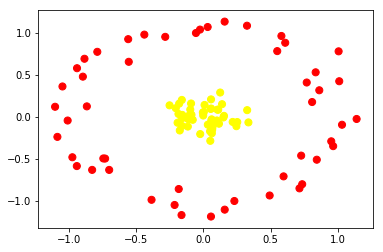

In [71]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

Feature Expansion: Map the features to a higher dimensional space and then do linear modelling there. 

In [72]:
#exp(x1 ** 2 + x2 ** 2)
r = np.exp(-(X ** 2).sum(1))



Text(0.5,0,'r')

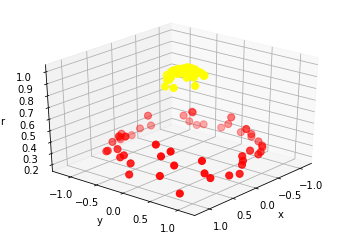

In [73]:
ax = plt.subplot(projection='3d')
ax.scatter3D(X[:,0], X[:,1], r, c=y, s=50, cmap='autumn')
ax.view_init(elev=30, azim=40)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('r')



Linear Regression with feature expansion

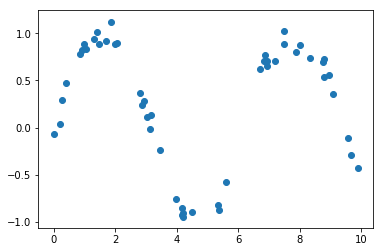

In [74]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)
plt.scatter(x, y)

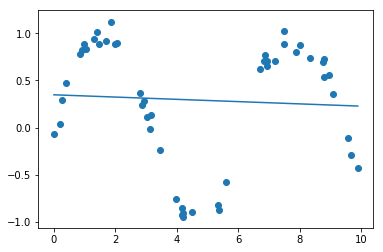

In [75]:
single_model = make_pipeline(LinearRegression())
single_model.fit(x.reshape(-1,1), y)

x_ = np.sort(x)
yfit = single_model.predict(x_.reshape(-1,1))

plt.scatter(x, y)
plt.plot(x_, yfit);

In [76]:
x_test = np.array([2, 3, 4])
poly = PolynomialFeatures(4, include_bias=False)
poly.fit_transform(x_test.reshape(-1,1))

array([[  2.,   4.,   8.,  16.],
       [  3.,   9.,  27.,  81.],
       [  4.,  16.,  64., 256.]])

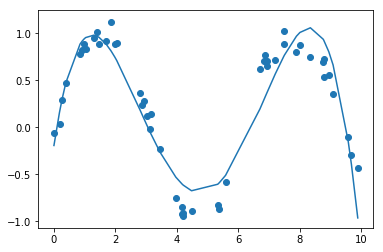

In [77]:
poly_model = make_pipeline(PolynomialFeatures(4),
                           LinearRegression())
poly_model.fit(x.reshape(-1,1), y)

x_ = np.sort(x)

yfit = poly_model.predict(x_.reshape(-1,1))

plt.scatter(x, y)
plt.plot(x_, yfit);

# Kernal


Kernel: 

$$ K(x_i, x_j) = \phi(x_i)^T * \phi(x_j) $$

Example: 
   
Homogeneous Polynomial Kernel: 
$$ k(x,y) = (x^Ty)^2 $$
https://disi.unitn.it/~passerini/teaching/2014-2015/MachineLearning/slides/17_kernel_machines/handouts.pdf

In [43]:
x = np.array([1,2])
y = np.array([3,4])

k = np.dot(x,y) ** 2
k

121

In [44]:
x_ = np.array([1, math.sqrt(2) * 1 * 2 , 4])
y_ = np.array([9, math.sqrt(2) * 3 * 4, 16])
np.dot(x_,y_)

121.0

Matrix Property:

Let, 

P = N by M

Q = M by N

$$(PQ + I_N)^{-1}P = P(QP + I_M)^{-1}$$

In Ridge Regression
$$ W = (X^TX + \lambda I)^{-1} X^Ty $$
$$ W = X^T(XX^T + \lambda I)^{-1} y $$

For any x that is n * 1 matrix

$$ y_=x^TW $$
$$ y_=x^TX^T(XX^T + \lambda I)^{-1} y  $$

Now,
$$ K = XX^T = \begin{bmatrix}
    x_1^Tx_1 & x_1^Tx_2  & \dots  & x_1^Tx_N \\
    x_2^Tx_1 & x_2^Tx_2  & \dots  & x_2^Tx_N \\
    \vdots & \vdots  & \ddots & \vdots \\
    x_N^Tx_1 & x_N^Tx_2  & \dots  & x_N^Tx_N
\end{bmatrix} $$

$$ K = XX^T = \begin{bmatrix}
    \phi(x_1)^T\phi(x_1) & \phi(x_1^T)\phi(x_2)  & \dots  & \phi(x_1^T)\phi(x_N)\\
    \phi(x_2)^T\phi(x_1) & \phi(x_2^T)\phi(x_2)  & \dots  & \phi(x_2^T)\phi(x_N) \\
    \vdots & \vdots  & \ddots & \vdots \\
    \phi(x_N^T)\phi(x_1) & \phi(x_N^T)\phi(x_2)  & \dots  & \phi(x_N^T)\phi(x_N)
\end{bmatrix} $$

$$ K = XX^T = \begin{bmatrix}
    K_{11} & K_{12}  & \dots  & K_{1N} \\
    K_{21} & K_{22}  & \dots  & K_{2N} \\
    \vdots & \vdots  & \ddots & \vdots \\
    K_{N1} & K_{N2}  & \dots  & K_{NN}
\end{bmatrix} $$


In the same way we can calculate $$ x^TX^T $$ as x is n by 1 matrix and X is n by n matrix

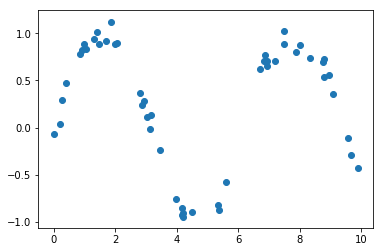

In [51]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)
plt.scatter(x, y)

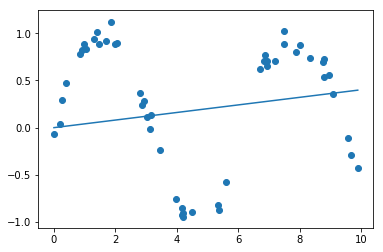

In [53]:
model = KernelRidge(alpha=1.0, kernel='linear')
model.fit(x.reshape(-1,1),y)

yfit = model.predict(x_.reshape(-1,1))
x_ = np.sort(x)
plt.scatter(x, y)
plt.plot(x_, yfit)

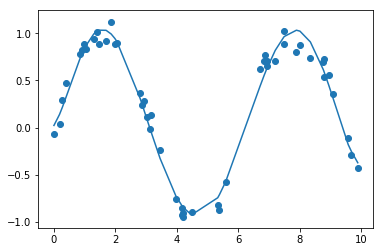

In [55]:
model = KernelRidge(alpha=1.0, kernel='poly', degree=7)
model.fit(x.reshape(-1,1),y)

yfit = model.predict(x_.reshape(-1,1))
x_ = np.sort(x)
plt.scatter(x, y)
plt.plot(x_, yfit)